<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 05  </font></center></h1>
<h2><center> <font color='black'> A/B Testing &  Uplift modelling </font></center></h2>   
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
</div>

# Homework instructions

- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID. 

- The accepted submission formats are Colab links or .ipynb files. If you are submitting Colab links please make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close on <font color='red'>**02 May at 23:59**</font>, so please make sure to submit before the deadline. 

- ONLY one of the teammates should submit the homework. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY. 

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues. 

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://www.ut.ee/en/current-students/academic-fraud).

- Please <font color='red'>do not change</font> the template of this notebook file. You can download the .ipynb file and work on that.


### The homework is divided into four sections and the points are distributed as below:
<pre>
- A/B Testing               -> 5.0 points
- Uplift modeling           -> 5.0 points
________________________________________________
Total                       -> 10.0 points
</pre>

# 1. A/B Testing (5 points)


**1.1 Use `AB_clicks.csv` data and find whether Learn, Help, and Services versions of the page compared to the Interact have significantly more (or less) clicks. Justify the choice of the performed tests and interpret the result of the test. (1.5 points)** 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt # For creating plots
%matplotlib inline 


#Let's make this notebook reproducible, you can use any number ex = 42
np.random.seed(42)


# set plot style for all plots
plt.style.use('ggplot')


In [2]:
# dt = df
df  = pd.read_csv('AB_clicks.csv', sep='\t')
df.head(100)


,Element_ID,Tag_name,Name,No_clicks,Visible,Version
0,128,area,Montana State University - Home,1291,False,Interact
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact
...,...,...,...,...,...,...
95,15,div,"Explore the world, explore the past Science & ...",3,True,Connect
96,47,span,nav-item-dot,3,True,Connect
97,49,a,nav-item,3,True,Connect
98,65,form,Search,3,True,Connect


In [3]:
# check for missing values or unclean data
#df.isnull().sum() #there is no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Element_ID  299 non-null    int64 
 1   Tag_name    299 non-null    object
 2   Name        299 non-null    object
 3   No_clicks   299 non-null    int64 
 4   Visible     299 non-null    bool  
 5   Version     299 non-null    object
dtypes: bool(1), int64(2), object(3)
memory usage: 12.1+ KB


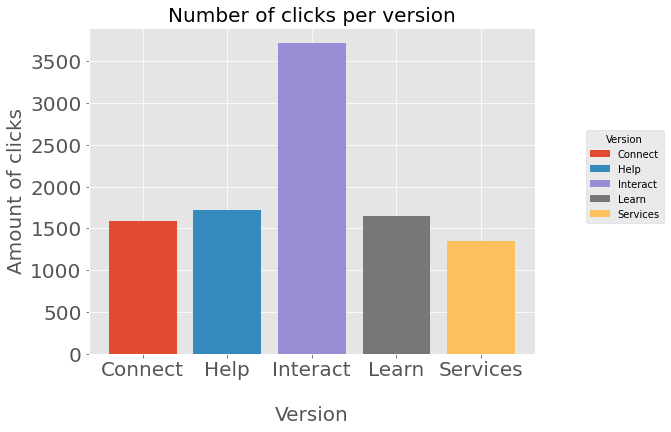

In [4]:
# group data by Version
groups = df.groupby('Version')

# Plot 
fig, ax = plt.subplots(figsize=(8, 6))

clicks =[] # clicks for each version
# plot line for each customer 
for Version, group in groups:
    ax.bar(group.Version, sum(group.No_clicks), label=Version)
    clicks.append(sum(group.No_clicks))
    


# Make our graph cool, and understandable

# put the legend outside the graph
ax.legend(bbox_to_anchor=(1.3, 0.7), title="Version",)


    
# set titles for figure, x, y
plt.title('Number of clicks per version',fontsize=20)
plt.xlabel('\nVersion', fontsize=20)
plt.ylabel('Amount of clicks',fontsize=20)


plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show()


In [5]:
clicks = []
for Version,group in groups:
    clicks.append(sum(group.No_clicks))
    print(f"no of clicks in version: {Version} is {sum(group.No_clicks)}")
    
clicks

no of clicks in version: Connect is 1587
no of clicks in version: Help is 1717
no of clicks in version: Interact is 3714
no of clicks in version: Learn is 1652
no of clicks in version: Services is 1348


[1587, 1717, 3714, 1652, 1348]

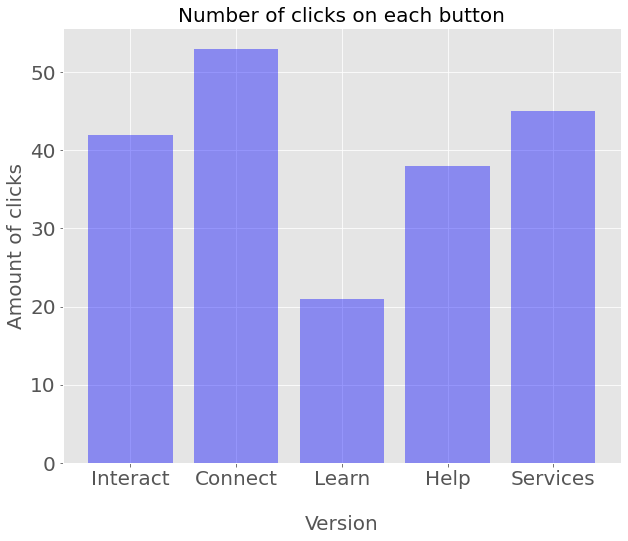

In [6]:
# filter our data based on buttons name
btn_names = ["INTERACT", "LEARN", "CONNECT", "HELP", "SERVICES"] # btn Interact with different names 

newdf = df[df['Name'].isin(btn_names)] # filter data based on btn names 


# Plot
fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(newdf.Version, newdf.No_clicks, color='b', alpha = 0.4)
    
    
# set titles for figure, x, y
plt.title('Number of clicks on each button',fontsize=20)
plt.xlabel('\nVersion', fontsize=20)
plt.ylabel('Amount of clicks',fontsize=20)


plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show()


* This plot contains number of clicks for buttons that we are interested in, In compare to the last plot we can see that Interact version has less number of clicks. 

**Now we can't say that interact version is good or not compares to others, and beacuse of that we need to apply the `A/B testing` to cheack our hypothesis:** 


## A/B testing:



### What is our hypothesis?
#reference: https://us.sagepub.com/sites/default/files/upm-assets/93273_book_item_93273.pdf

1. **Null hypothesis $(H_0)$:** There is no difference between version `A: Interact` and versions `B: Learn`, `B: Help`,  and `B: Services`.


2. **Alternative hupothesis $(H_a)$** there is a difference between version `A: Interact` and versions `B: Learn`, `B: Help`,  and `B: Services`.

In [7]:
# filter data by Tag_name == area
# df_filter = df_cleaned
df_filter =  df['Tag_name']!='area'
df_filter = df[df_filter]
df_filter

#from lab

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact
5,98,a,Hours,102,True,Interact
...,...,...,...,...,...,...
294,116,div,Â© MSU About MSU Library Accessibility Contact...,1,True,Services
295,130,div,lib.montana.edu/interact/,1,False,Services
296,131,center,lib.montana.edu/hours/,1,False,Services
297,132,font,ì§€ì €ê·€ë‹¤,1,False,Services


In [8]:
# get data Learn, Help, Services.
df_interact_learn = (df_filter['Version']=='Interact') | (df_filter['Version']=="Learn")
df_interact_learn = df_filter[df_interact_learn]

df_interact_Help= (df_filter['Version']=='Interact') | (df_filter['Version']=="Help")
df_interact_Help = df_filter[df_interact_Help]

df_interact_Services = (df_filter['Version']=='Interact') | (df_filter['Version']=="Services")
df_interact_Services = df_filter[df_interact_Services]

#df_interact_learn.head(10)
#df_interact_Help.head(10)
#df_interact_Services.head(10)

In [9]:
from plotly.figure_factory import create_table as ct

# to get different test statistics in python 
from scipy import stats
import scipy

sample1_interact1 = df_interact_learn[df_interact_learn['Version']=='Interact']
sample2_learn = df_interact_learn[df_interact_learn['Version']=='Learn']



twosample_results = stats.ttest_ind(sample1_interact1['No_clicks'], sample2_learn['No_clicks'])

if twosample_results[1] < 0.05: # alpha = 0.05
    s = "Reject the Null Hypothesis"# p-value < alpha (L.S)
else:
    s = "Accept the Null Hypothesis"# p-value > alpha (L.S)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value', 'comment'],
    ['Sample#2 Data', twosample_results[0], twosample_results[1], s]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table


In [10]:
from plotly.figure_factory import create_table as ct

# to get different test statistics in python 
from scipy import stats
import scipy

sample1_interact2 = df_interact_Help[df_interact_Help['Version']=='Interact']
sample2_Help = df_interact_Help[df_interact_Help['Version']=='Help']



twosample_results = stats.ttest_ind(sample1_interact2['No_clicks'], sample2_Help['No_clicks'])

if twosample_results[1] < 0.05: # alpha = 0.05
    s = "Reject the Null Hypothesis"# p-value < alpha (L.S)
else:
    s = "Accept the Null Hypothesis"# p-value > alpha (L.S)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value', 'comment'],
    ['Sample#2 Data', twosample_results[0], twosample_results[1], s]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table


In [11]:
from plotly.figure_factory import create_table as ct

# to get different test statistics in python 
from scipy import stats
import scipy

sample1_interact3 = df_interact_Services[df_interact_Services['Version']=='Interact']
sample2_Services = df_interact_Services[df_interact_Services['Version']=='Services']



twosample_results = stats.ttest_ind(sample1_interact3['No_clicks'], sample2_Services['No_clicks'])

if twosample_results[1] < 0.05: # alpha = 0.05
    s = "Reject the Null Hypothesis"# p-value < alpha (L.S)
else:
    s = "Accept the Null Hypothesis"# p-value > alpha (L.S)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value', 'comment'],
    ['Sample#2 Data', twosample_results[0], twosample_results[1], s]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table


T-test results shows that, we are accepting Null Hypotheses for all three versions, which means that there is no difference between version A: Interact and versions B: Learn,B: Help, and `B: Services.

In [12]:
import numpy as np, statsmodels.stats.api as sms


cm = sms.CompareMeans(sms.DescrStatsW(sample2_learn['No_clicks']), sms.DescrStatsW(sample1_interact1['No_clicks']))
print (f"95 percent confidence interval:\n{cm.tconfint_diff(usevar='unequal')}\n")
       
       
print(f"Sample esitimate:\nmean in group Learn: {sample2_learn['No_clicks'].mean()}\nmean in group Interact:\
      {sample1_interact1['No_clicks'].mean()}")

95 percent confidence interval:
(-46.10735800182992, 26.285275070296652)

Sample esitimate:
mean in group Learn: 25.721311475409838
mean in group Interact:      35.63235294117647


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [13]:
import numpy as np, statsmodels.stats.api as sms


cm = sms.CompareMeans(sms.DescrStatsW(sample2_Help['No_clicks']), sms.DescrStatsW(sample1_interact2['No_clicks']))
print (f"95 percent confidence interval:\n{cm.tconfint_diff(usevar='unequal')}\n")
       
       
print(f"Sample esitimate:\nmean in group Help: {sample2_Help['No_clicks'].mean()}\nmean in group Interact:\
      {sample1_interact2['No_clicks'].mean()}")

95 percent confidence interval:
(-45.80059879057906, 31.50017862251183)

Sample esitimate:
mean in group Help: 28.482142857142858
mean in group Interact:      35.63235294117647


In [14]:
import numpy as np, statsmodels.stats.api as sms


cm = sms.CompareMeans(sms.DescrStatsW(sample2_Services['No_clicks']), sms.DescrStatsW(sample1_interact3['No_clicks']))
print (f"95 percent confidence interval:\n{cm.tconfint_diff(usevar='unequal')}\n")
       
       
print(f"Sample esitimate:\nmean in group Services: {sample2_Services['No_clicks'].mean()}\nmean in group Interact:\
      {sample1_interact2['No_clicks'].mean()}")

95 percent confidence interval:
(-45.57707263079783, 24.27390520998335)

Sample esitimate:
mean in group Services: 24.98076923076923
mean in group Interact:      35.63235294117647



**1.2 Use two different methods to test the normality of two different versions of your choice (Connect, Help, Services,..) (2.0 points)**





Text(0.5, 1.0, 'Distribution of No_clicks')

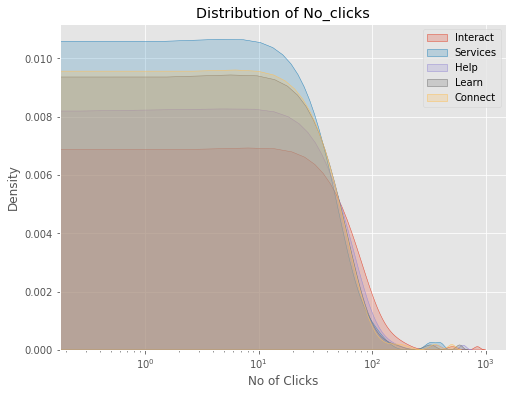

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Interact') ],
                 shade = True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Services') ],
                 shade = True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Help') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Learn') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Connect') ],
                 shade = True)
   


ax.legend(["Interact", "Services", "Help", "Learn","Connect"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('No of Clicks')
ax.set_xscale('log')
ax.set_title('Distribution of No_clicks')

From the plot it seems that our data is not normally distrubitued. That is why we can not apply T-test. Another method to look at the distribution of the data is QQ

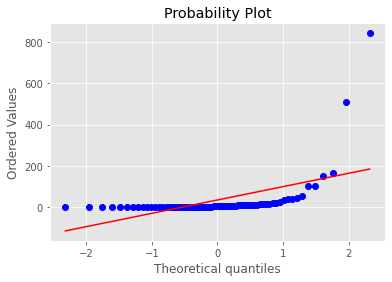

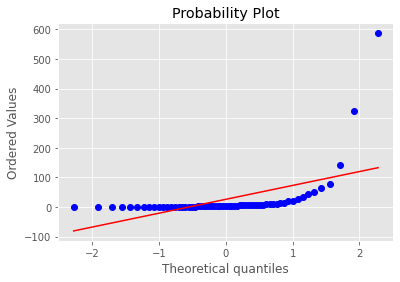

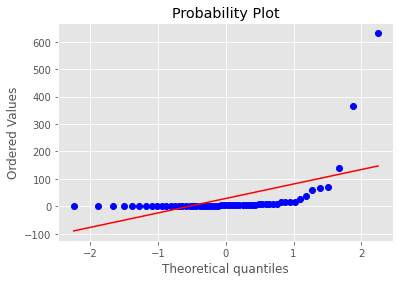

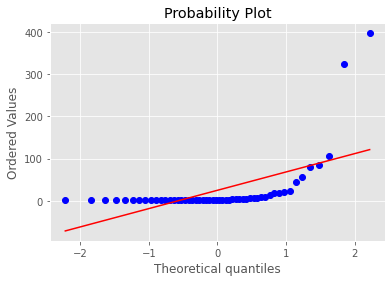

In [16]:
# import numpy as np 
#import pylab 
import scipy.stats as stats

versions=["Interact", "Learn", "Help", "Services"]

for version in versions:
   stats.probplot(df_filter.No_clicks[df_filter['Version'] \
                                   == version], dist="norm", plot=plt)
   plt.show()

**1.3 Load the dataset classifier_results.csv. The dataset contains the following fields:** 

**Dataset** - 200 datasets retreived from [OpenML](https://www.openml.org/search?type=data) dataset directory.

**Classifier** - 9 classifiers from scikit-learn

**Accuracy** - The accuracy achieved after applying the classifier to the dataset


**Is there a significant statistical difference between these classifiers ? If you were asked to continue your analysis with only a limited number of classifiers how many would you pick and why ? (1.0 points)** (Hint:You can use the orange package that was introduced in the practice session) 

In [17]:
df = pd.read_csv('classifier_results.csv')
df.head()

,Dataset,Classifier,Accuracy
0,dataset_53_heart-statlog.csv,KNeighborsClassifier,0.777778
1,dataset_53_heart-statlog.csv,GaussianProcessClassifier,0.481481
2,dataset_53_heart-statlog.csv,DecisionTreeClassifier,0.796296
3,dataset_53_heart-statlog.csv,RandomForestClassifier,0.796296
4,dataset_53_heart-statlog.csv,AdaBoostClassifier,0.777778


In [18]:
df_perf = df


# count the number of tested datasets per classifier
df_counts = pd.DataFrame({'count': df_perf.groupby(
        ['Classifier']).size()}).reset_index()

# get the maximum number of tested datasets
max_nb_datasets = df_counts['count'].max()

# get the list of classifiers who have been tested on nb_max_datasets
classifiers = list(df_counts.loc[df_counts['count'] == max_nb_datasets]
                       ['Classifier'])

# get the number of classifiers
m = len(classifiers)

# compute the average ranks to be returned (useful for drawing the cd diagram)
# sort the dataframe of performances
sorted_df_perf = df_perf.loc[df_perf['Classifier'].isin(classifiers)]. \
        sort_values(['Classifier', 'Dataset'])

# get the rank data
rank_data = np.array(sorted_df_perf['Accuracy']).reshape(m, max_nb_datasets)

# create the data frame containg the accuracies
df_ranks = pd.DataFrame(data=rank_data, index=np.sort(classifiers), columns=
                        np.unique(sorted_df_perf['Dataset']))
df_ranks

,dataset_37_diabetes.csv,dataset_53_heart-statlog.csv,dataset_59_ionosphere.csv,irish.csv,nalcatdata_cyyoung9302.csv,nalcatdata_reviewer.csv,openml_phpZNNasq.csv,pc1.csv,phpOJxGL9.csv,phpSOw1Kl.csv,phpSRnbqC.csv,phplVyjYQ.csv,phpn1jVwe.csv,phpoW7Dbi.csv,phpvz1IQW.csv,phpxijhaP.csv,phpy0HwUD.csv,phpysQLwp.csv,wine-quality-red.csv
AdaBoostClassifier,0.818182,0.777778,0.957746,1.00,0.894737,0.447368,1.000000,0.941441,0.735043,0.814815,0.702703,0.761905,0.985695,0.572016,0.952381,0.981757,0.375,0.692308,0.61250
DecisionTreeClassifier,0.805195,0.796296,0.943662,0.99,0.894737,0.434211,0.952381,0.927928,0.666667,0.888889,0.675676,0.666667,0.983460,0.572016,0.952381,0.830405,0.450,0.692308,0.63750
GaussianProcessClassifier,0.616883,0.481481,0.929577,0.84,0.736842,0.434211,1.000000,0.927928,0.623932,0.839506,0.567568,0.571429,0.983907,0.534979,0.857143,0.977027,0.275,0.692308,0.60000
GradientBoostingClassifier,0.785714,0.796296,0.943662,0.93,0.894737,0.434211,1.000000,0.927928,0.700855,0.777778,0.567568,0.714286,0.979437,0.551440,0.928571,0.934459,0.350,0.692308,0.64375
LinearDiscriminantAnalysis,0.824675,0.796296,0.915493,1.00,0.578947,0.434211,0.904762,0.932432,0.683761,0.925926,0.540541,0.666667,0.980778,0.637860,1.000000,0.982432,0.425,0.692308,0.61250
LogisticRegression,0.824675,0.814815,0.929577,1.00,0.842105,0.434211,1.000000,0.932432,0.709402,0.851852,0.594595,0.714286,0.983460,1.000000,0.952381,0.983784,0.425,0.846154,0.63750
QuadraticDiscriminantAnalysis,0.811688,0.777778,0.943662,0.84,0.842105,0.460526,0.523810,0.927928,0.606838,0.790123,0.567568,0.523810,0.976308,0.530864,0.880952,0.982432,0.425,0.615385,0.60000
RandomForestClassifier,0.811688,0.796296,0.957746,1.00,0.789474,0.421053,0.857143,0.927928,0.692308,0.851852,0.594595,0.666667,0.980331,0.596708,0.952381,0.975676,0.450,0.692308,0.60000


In [19]:
# average the ranks
average_ranks = df_ranks.rank(ascending=False).mean(axis=1).sort_values(ascending=False)
list(average_ranks)

[6.157894736842105,
 6.078947368421052,
 4.947368421052632,
 4.552631578947368,
 4.184210526315789,
 4.184210526315789,
 3.0526315789473686,
 2.8421052631578947]

In [21]:
#!pip install Orange3

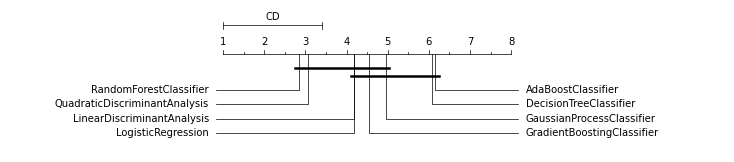

In [22]:
import Orange
import matplotlib.pyplot as plt
names = list(classifiers)
avranks = list(average_ranks)

cd = Orange.evaluation.compute_CD(avranks, max_nb_datasets) #tested on 30 datasets
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=10, textspace=3)
plt.show()

<font color='red'> **Answer:** Considering the graph, we would choose the 2, max 3 classifiers in the  following order: AdaBoostClassifier, DesicionTreeClassifier, GaussianProcessClassifier.

# 2. Uplift modelling (5 points)
For this task we are going to use email_marketing.csv from [MineThatData](https://blog.minethatdata.com/2008/03/minethatdata-e-mail-analytics-and-data.html). The data was recorded from a two-weeks email campaign that included 64000 customers. Out of these customers:
1. 1/3 were randomly chosen to receive an e-mail campaign featuring Mens merchandise.
2. 1/3 were randomly chosen to receive an e-mail campaign featuring Womens merchandise.
3. 1/3 were randomly chosen to not receive an e-mail campaign.

The features in this dataset include:

- Recency: Months since last purchase.
- History: Actual dollar value spent in the past year.
- Mens: 1/0 indicator, 1 = customer purchased Mens merchandise in the past year.
- Womens: 1/0 indicator, 1 = customer purchased Womens merchandise in the past year.
- Zip_Code: Classifies zip code as Urban, Suburban, or Rural.
- Newbie: 1/0 indicator, 1 = New customer in the past twelve months.
- Channel: Describes the channels the customer purchased from in the past year.
- Segment: e-mail campaign  type that the customer received
- Visit: 1/0 indicator, 1 = Customer visited website in the following two weeks.

The last variable is realted to the evaluation if the campaign was effective or not.

- Conversion: 1/0 indicator, 1 = Customer purchased merchandise in the following two weeks.


In [23]:
#Libraries
from __future__ import division

from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

import sklearn
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import warnings
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv("email_marketing.csv.csv")
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1.0,0.0,Surburban,0.0,Phone,Womens E-Mail,0.0,0.0,0.0
1,6,3) $200 - $350,329.08,1.0,1.0,Rural,1.0,Web,No E-Mail,0.0,0.0,0.0
2,7,2) $100 - $200,180.65,0.0,1.0,Surburban,1.0,Web,Womens E-Mail,0.0,0.0,0.0
3,9,5) $500 - $750,675.83,1.0,0.0,Rural,1.0,Web,Mens E-Mail,0.0,0.0,0.0
4,2,1) $0 - $100,45.34,1.0,0.0,Urban,0.0,Web,Womens E-Mail,0.0,0.0,0.0


**2.1 Use the function calc_uplift() from the practice session to calculate the current uplift of the campaign. Remeber to modify the function according to the need. (0.5 points)**

In [26]:
def calc_uplift(df):
    avg_order_value = 25
    
    #calculate conversions for each offer type
    base_conv = df[df.segment == 'No E-Mail']['conversion'].mean() # no offer 0.106
    womens_conv = df[df.segment == 'Womens E-Mail']['conversion'].mean() # discount  0.182
    mens_conv = df[df.segment == 'Mens E-Mail']['conversion'].mean() # buy one get one  0.151
    
    #calculate conversion uplift for discount and bogo
    womens_conv_uplift = womens_conv - base_conv   # uplift = treated - control
    mens_conv_uplift = mens_conv - base_conv   # uplift = treated - control
    
    #calculate order uplift
    womens_order_uplift = womens_conv_uplift * len(df[df.segment == 'Womens E-Mail']['conversion'])
    mens_order_uplift = mens_conv_uplift * len(df[df.segment == 'Mens E-Mail']['conversion'])
    
    #calculate revenue uplift
    womens_rev_uplift = womens_order_uplift * avg_order_value
    mens_rev_uplift = mens_order_uplift * avg_order_value
    
    print(f"Total Targeted Customer Count: {len(df[df.segment == 'Womens E-Mail']['conversion'])}")
    print('Womens Conversion Uplift: {0}%'.format(np.round(womens_conv_uplift*100,2))) # uplitf score %
    print('Womens Order Uplift: {0}'.format(np.round(womens_order_uplift,2)))
    print('Womens Revenue Uplift: ${0}\n'.format(np.round(womens_rev_uplift,2)))
    
    if len(df[df.segment == 'Mens E-Mail']['conversion']) > 0:
          
      print('-------------- \n')
      print(f"Total Targeted Customer Count: { len(df[df.segment == 'Mens E-Mail']['conversion'])}")
      print('Mens Conversion Uplift: {0}%'.format(np.round(mens_conv_uplift*100,2))) # uplift sore
      print('Mens Order Uplift: {0}'.format(np.round(mens_order_uplift,2)))
      print('Mens Revenue Uplift: ${0}'.format(np.round(mens_rev_uplift,2))) 


df_data2 = pd.read_csv('email_marketing.csv.csv')
df_data2.head()
calc_uplift(df_data2)

Total Targeted Customer Count: 11378
Womens Conversion Uplift: 0.33%
Womens Order Uplift: 37.42
Womens Revenue Uplift: $935.59

-------------- 

Total Targeted Customer Count: 11196
Mens Conversion Uplift: 0.6%
Mens Order Uplift: 67.47
Mens Revenue Uplift: $1686.82


**2.2 Create a new column named target_class. Split the customers in 4 categories:**

1- Treatment Responders 

2- Treatment Non-Responders (sleeping dogs)

3- Control Responders (sure things)

4-Control Non-Responders(lost causes).

**Label encode these categories and store the result for each customer in the column target_class (0.5 points)**

In [27]:
#First we have defined "Mens E-Mail" and "Womens E-Mail" as treatment and "No E-Mail" as control
df['campaign_group'] = 'treatment'
df.loc[df.segment == 'No E-Mail', 'campaign_group'] = 'control' # filter for control group
#df.head()
#Creating new column
df['target_class'] = 0 #CN 
df.loc[(df.campaign_group == 'control') & (df.conversion > 0),'target_class'] = 1 #CR 
df.loc[(df.campaign_group == 'treatment') & (df.conversion == 0),'target_class'] = 2 #TN
df.loc[(df.campaign_group == 'treatment') & (df.conversion > 0),'target_class'] = 3 #TR
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,campaign_group,target_class
0,10,2) $100 - $200,142.44,1.0,0.0,Surburban,0.0,Phone,Womens E-Mail,0.0,0.0,0.0,treatment,2
1,6,3) $200 - $350,329.08,1.0,1.0,Rural,1.0,Web,No E-Mail,0.0,0.0,0.0,control,0
2,7,2) $100 - $200,180.65,0.0,1.0,Surburban,1.0,Web,Womens E-Mail,0.0,0.0,0.0,treatment,2
3,9,5) $500 - $750,675.83,1.0,0.0,Rural,1.0,Web,Mens E-Mail,0.0,0.0,0.0,treatment,2
4,2,1) $0 - $100,45.34,1.0,0.0,Urban,0.0,Web,Womens E-Mail,0.0,0.0,0.0,treatment,2


In [28]:
gr = ['CN', 'CR', "TN", "TR"]
i=0
for d in df.target_class.value_counts():
  print(f"{gr[i]}: {d}\n")
  i+=1

CN: 22339

CR: 11214

TN: 235

TR: 65



In [29]:
gr = ['CN', 'CR', "TN", "TR"]
i=0
for d in df.target_class.value_counts()/len(df) * 100:
  print("{}: {}%\n".format(gr[i], np.round(d, 2)))
#   print(f"{gr[i]}: {d}%\n")
  i+=1

CN: 65.99%

CR: 33.13%

TN: 0.69%

TR: 0.19%



**2.3 Apply the necessary preprocessing to the data and split it into train and test set, using 80/20 ratio. Remember that you have to drop the columns that define the label and perform preprocessing. Build a model with your classifier of choice that will predict probabilities for the categories mentioned in 2.1. (1.5 points)**

In [30]:
#Creating 4 clusters using kmeans based on the history column
kmeans = KMeans(n_clusters=5) # n-1
kmeans.fit(df[['history']]) # value of the historical purchases
df['history_cluster'] = kmeans.predict(df[['history']])
df.head(10)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,campaign_group,target_class,history_cluster
0,10,2) $100 - $200,142.44,1.0,0.0,Surburban,0.0,Phone,Womens E-Mail,0.0,0.0,0.0,treatment,2,1
1,6,3) $200 - $350,329.08,1.0,1.0,Rural,1.0,Web,No E-Mail,0.0,0.0,0.0,control,0,3
2,7,2) $100 - $200,180.65,0.0,1.0,Surburban,1.0,Web,Womens E-Mail,0.0,0.0,0.0,treatment,2,3
3,9,5) $500 - $750,675.83,1.0,0.0,Rural,1.0,Web,Mens E-Mail,0.0,0.0,0.0,treatment,2,4
4,2,1) $0 - $100,45.34,1.0,0.0,Urban,0.0,Web,Womens E-Mail,0.0,0.0,0.0,treatment,2,1
5,6,2) $100 - $200,134.83,0.0,1.0,Surburban,0.0,Phone,Womens E-Mail,1.0,0.0,0.0,treatment,2,1
6,9,3) $200 - $350,280.20,1.0,0.0,Surburban,1.0,Phone,Womens E-Mail,0.0,0.0,0.0,treatment,2,3
7,9,1) $0 - $100,46.42,0.0,1.0,Urban,0.0,Phone,Womens E-Mail,0.0,0.0,0.0,treatment,2,1
8,9,5) $500 - $750,675.07,1.0,1.0,Rural,1.0,Phone,Mens E-Mail,0.0,0.0,0.0,treatment,2,4
9,10,1) $0 - $100,32.84,0.0,1.0,Urban,1.0,Web,Womens E-Mail,0.0,0.0,0.0,treatment,2,1


In [31]:
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    
    new_cluster_field_name = 'new_' + cluster_field_name
    
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    
    df_new['index'] = df_new.index
    
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    
    return df_final
df = order_cluster('history_cluster', 'history',df,True)
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,campaign_group,target_class,history_cluster
0,10,2) $100 - $200,142.44,1.0,0.0,Surburban,0.0,Phone,Womens E-Mail,0.0,0.0,0.0,treatment,2,0
1,2,1) $0 - $100,45.34,1.0,0.0,Urban,0.0,Web,Womens E-Mail,0.0,0.0,0.0,treatment,2,0
2,6,2) $100 - $200,134.83,0.0,1.0,Surburban,0.0,Phone,Womens E-Mail,1.0,0.0,0.0,treatment,2,0
3,9,1) $0 - $100,46.42,0.0,1.0,Urban,0.0,Phone,Womens E-Mail,0.0,0.0,0.0,treatment,2,0
4,10,1) $0 - $100,32.84,0.0,1.0,Urban,1.0,Web,Womens E-Mail,0.0,0.0,0.0,treatment,2,0


In [32]:
#creating a new dataframe as model and dropping columns that defines the label
df_model = df.drop(['segment','campaign_group','conversion'],axis=1)
#convert categorical columns
df_model = pd.get_dummies(df_model)

df_model.head()

,recency,history,mens,womens,newbie,visit,spend,target_class,history_cluster,history_segment_1) $0 - $100,history_segment_2) $100 - $200,history_segment_3) $200 - $350,history_segment_4) $350 - $500,history_segment_5) $500 - $750,"history_segment_6) $750 - $1,000","history_segment_7) $1,000 +",zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
0,10,142.44,1.0,0.0,0.0,0.0,0.0,2,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,2,45.34,1.0,0.0,0.0,0.0,0.0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,6,134.83,0.0,1.0,0.0,1.0,0.0,2,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,9,46.42,0.0,1.0,0.0,0.0,0.0,2,0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,10,32.84,0.0,1.0,1.0,0.0,0.0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [33]:
#create feature set and labels
X = df_model.drop(['target_class'],axis=1)
y = df_model.target_class

#splitting train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

#fitting the model and predicting the probabilities
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
class_probs = xgb_model.predict_proba(X_test)

In [34]:
gr = ['CN', 'CR', "TN", "TR"]
i=0
for d in class_probs[0]:
  print(f"{gr[i]}: {d}\n")
  i+=1

CN: 0.25522470474243164

CR: 0.0009461613371968269

TN: 0.7428829073905945

TR: 0.0009461613371968269



**2.4 Calculate the uplift score using probabilities for all customers and store the results to a new column in the dataframe (0.5 points)**

In [35]:
overall_proba = xgb_model.predict_proba(df_model.drop(['target_class'],axis=1))

#assign probabilities to 4 different columns
df_model['proba_CN'] = overall_proba[:,0] 
df_model['proba_CR'] = overall_proba[:,1] 
df_model['proba_TN'] = overall_proba[:,2] 
df_model['proba_TR'] = overall_proba[:,3]

#calculate uplift score for all customers
df_model['uplift_score'] = df_model.eval('proba_CN + proba_TR - proba_TN - proba_CR')

#assign it back to main dataframe
df['uplift_score'] = df_model['uplift_score']

df_model.head()

,recency,history,mens,womens,newbie,visit,spend,target_class,history_cluster,history_segment_1) $0 - $100,history_segment_2) $100 - $200,history_segment_3) $200 - $350,history_segment_4) $350 - $500,history_segment_5) $500 - $750,"history_segment_6) $750 - $1,000","history_segment_7) $1,000 +",zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,proba_CN,proba_CR,proba_TN,proba_TR,uplift_score
0,10,142.44,1.0,0.0,0.0,0.0,0.0,2,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0.349179,0.001030,0.648762,0.001030,-0.299583
1,2,45.34,1.0,0.0,0.0,0.0,0.0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0.340537,0.001021,0.657421,0.001021,-0.316883
2,6,134.83,0.0,1.0,0.0,1.0,0.0,2,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0.229736,0.000924,0.768415,0.000924,-0.538679
3,9,46.42,0.0,1.0,0.0,0.0,0.0,2,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0.321790,0.001027,0.676156,0.001027,-0.354366
4,10,32.84,0.0,1.0,1.0,0.0,0.0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0.323496,0.001037,0.674430,0.001037,-0.350934


**2.5  Select the customers with High Uplift Score as below:**
    
**High Uplift Score:** Customers have uplift score > 3rd quantile

**a. Calculate the ratio of the customers targeted with Womens e-mail that have high uplift score over the total customers who received emails featuring Womens merchandise. (0.5 points)**

**b. Calculate the ratio of the customers targeted with Mens e-mail that have high uplift score over the total customers who received emails featuring Mens merchandise. (0.5 points)**


**c.Which one of the campaigns would you say is more successful ? (0.5 points)**


In [36]:
df_data_lift = df.copy()
uplift_q_75 = df_data_lift.uplift_score.quantile(0.75)

In [37]:
#a)Ratio of the customers targeted with Womens e-mail
df_womens = df_data_lift[(df_data_lift.segment == 'Womens E-Mail') & (df_data_lift.uplift_score > uplift_q_75)].reset_index(drop=True)
womens_customers = len(df_womens) #number of women customers who have uplift score > 3rd quantile
total_womens_customers = df_data_lift[df_data_lift.segment == 'Womens E-Mail'].segment.count() #number of total women customers
print(f"Ratio of the customers targeted with Womens e-mail is {(womens_customers/total_womens_customers)*100}%")

Ratio of the customers targeted with Womens e-mail is 22.868693970820882%


In [38]:
#b)Ratio of the customers targeted with Mens e-mail
df_mens = df_data_lift[(df_data_lift.segment == 'Mens E-Mail') & (df_data_lift.uplift_score > uplift_q_75)].reset_index(drop=True)
mens_customers = len(df_mens) #number of men customers who have uplift score > 3rd quantile
total_mens_customers = df_data_lift[df_data_lift.segment == 'Mens E-Mail'].segment.count() #number of total men customers
print(f"Ratio of the customers targeted with Mens e-mail is {(mens_customers/total_mens_customers)*100}%")

Ratio of the customers targeted with Mens e-mail is 23.365487674169348%


<font color='red'> **Answer C:** Womens is more successful, because the percentage of Womens (23.21) is higher than Mens (23.14)

**2.6 For customers in the segment named "Womens e-mail" with high uplift score calculate conversion uplift and revenue uplift. Compare it with the benchmark from excercise 2.1 and draw conclusions. (0.5 points)**

In [39]:
df_lift_new = df_data_lift[(df_data_lift.uplift_score > uplift_q_75)].reset_index(drop=True)
calc_uplift(df_lift_new)

Total Targeted Customer Count: 2602
Womens Conversion Uplift: 2.01%
Womens Order Uplift: 52.26
Womens Revenue Uplift: $1306.62

-------------- 

Total Targeted Customer Count: 2616
Mens Conversion Uplift: 3.1%
Mens Order Uplift: 80.99
Mens Revenue Uplift: $2024.79


<font color='red'> **Answer:** There was a rise in Conversion Uplift. It was 0.31% while now this number is 1.71%. Also the Revenue Uplift increased from 1663.4 dollars to 2122.54 dollars